In [3]:
%load_ext autoreload 
%autoreload 2
from matplotlib.colors import LogNorm, Normalize
import matplotlib.pyplot as plt
from helpers import set_size
from tqdm import tqdm
import seaborn as sns
import numpy as np
import pickle
import cfrs


In [284]:
parameters = {
    "n_users": 600,
    "n_items": 600,
    "z": 60,
    "list_alphas":[1, 1, 1.3, 5, 12],
    "list_betas":[12, 5, 1.3, 1, 1], 
    "list_scales":[1, 1.2, 1.5, 1.2, 1],
    "list_sizes": np.array([75, 125, 200, 125, 75]),
    "k": 10,
    "r": 20
}


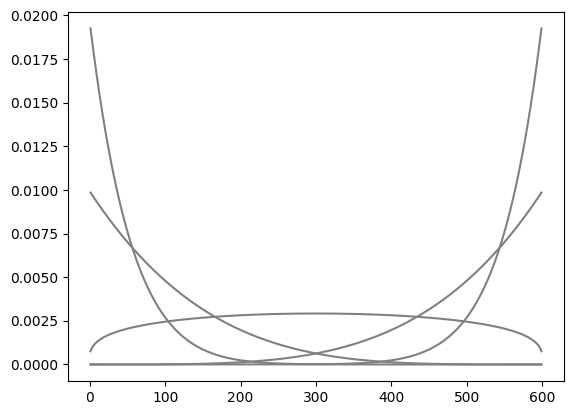

In [286]:
import scipy.stats as stats

for alpha, beta, scale in zip(parameters["list_alphas"],
                              parameters["list_betas"],
                              parameters["list_scales"]):
    
    x = np.arange(1, parameters["n_users"], 1)
    rvC = stats.betabinom(parameters["n_users"], alpha, beta)
    plt.plot(x, rvC.pmf(x) * scale, color="#808080")

In [249]:
def prepare_matrices(parameters, seedv=97836):
    np.random.seed(seedv)

    S = cfrs.CollaborativeFiltering(
        n_users=parameters["n_users"], 
        n_items=parameters["n_items"],
        k=parameters["k"], 
        r=parameters["r"]
    )

    M = cfrs.Users(
        n_users=parameters["n_users"], 
        n_items=parameters["n_items"],
        list_alphas=parameters["list_alphas"],
        list_betas=parameters["list_betas"],
        list_scales=parameters["list_scales"],
        list_sizes=parameters["list_sizes"],
    )

    cfrs.burn_in(M, S, z=parameters["z"])
    return S, M

S, M = prepare_matrices(parameters)

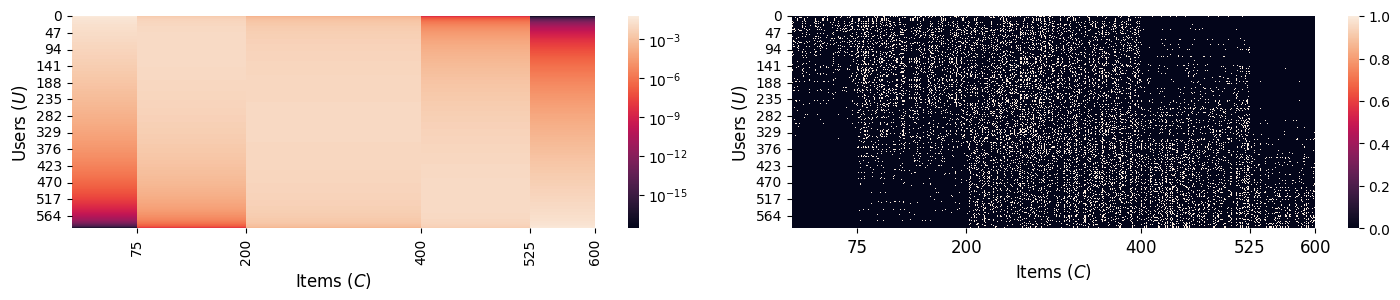

In [250]:

fig, axs = plt.subplots(1,2, figsize=(9,2.5), gridspec_kw={"wspace": 0.1}, sharex=True)

sns.heatmap(M.X, norm=LogNorm(), ax=axs[0])
axs[0].set_ylabel("Users ($U$)", fontsize=12)
axs[0].set_xlabel("Items ($C$)", fontsize=12)

sns.heatmap(S.X, ax=axs[1])
axs[1].set_ylabel("Users ($U$)", fontsize=12)

axs[1].set_xlabel("Items ($C$)", fontsize=12)
axs[1].set_xticks(parameters["list_sizes"].cumsum())
axs[1].set_xticklabels(parameters["list_sizes"].cumsum(), rotation=0, fontsize=12)
set_size(fig, (14,3));

In [287]:
# Creates 100 randomly initialized matrices
vals = {}
vals["parameters"] = parameters
vals["num_matrices"] = 100
vals["matrices"]  = {}
for i in tqdm(range(vals["num_matrices"])):
    S, M = prepare_matrices(parameters, seedv=i)
    vals["matrices"][i] = {"S": S, "M": M}
    
with open("mat.pkl", "wb") as f:
    pickle.dump(vals, f)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:22:13<00:00, 49.33s/it]
